# 1 Matrix operations

## 1.1 Create a 4*4 identity matrix

In [1]:
#This project is designed to get familiar with python list and linear algebra
#You cannot use import any library yourself, especially numpy

A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

#TODO create a 4*4 identity matrix 
I = [
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,0],
    [0,0,0,1]
    ]

## 1.2 get the width and height of a matrix. 

In [2]:
#TODO Get the height and weight of a matrix.
def shape(M):
    height = len(M)
    weight = 0
    if height > 0:
        weight = len(M[0])
    return height,weight

In [3]:
# run following code to test your shape function
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


## 1.3 round all elements in M to certain decimal points

In [4]:
# TODO in-place operation, no return value
# TODO round all elements in M to decPts
def matxRound(M, decPts=4):
    for row, rowList in enumerate(M):
        for col, value in enumerate(rowList):
            M[row][col] = round(value, decPts)

In [5]:
# run following code to test your matxRound function
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.008s

OK


## 1.4 compute transpose of M

In [6]:
#TODO compute transpose of M
def transpose(M):
    return list(map(list, zip(*M)))

In [7]:
# run following code to test your transpose function
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


## 1.5 compute AB. return None if the dimensions don't match

In [8]:
#TODO compute matrix multiplication AB, return None if the dimensions don't match
def matxMultiply(A, B):
    height_A, weight_A = shape(A)
    height_B, weight_B = shape(B)
    
    DIMENSIONS_NOT_MATCH = "Matrix A's column number doesn't equal to Matrix b's row number"
        
    if weight_A != height_B:
        raise ValueError(DIMENSIONS_NOT_MATCH)
    
    return [[sum((a*b) for a, b in zip(row, col)) for col in zip(*B)] for row in A]

In [9]:
# run following code to test your matxMultiply function
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.033s

OK


---

# 2 Gaussian Jordan Elimination

## 2.1 Compute augmented Matrix 

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

Return $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [10]:
#TODO construct the augment matrix of matrix A and column vector b, assuming A and b have same number of rows
def augmentMatrix(A, b):
    return [ra + rb for ra, rb in zip(A, b)]

In [11]:
# run following code to test your augmentMatrix function
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 2.2 Basic row operations
- exchange two rows
- scale a row
- add a scaled row to another

In [12]:
# TODO r1 <---> r2
# TODO in-place operation, no return value
def swapRows(M, r1, r2):
    M[r1], M[r2] = M[r2], M[r1]

In [13]:
# run following code to test your swapRows function
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


In [14]:
# TODO r1 <--- r1 * scale
# TODO in-place operation, no return value
def scaleRow(M, r, scale):
    if scale == 0:
        raise ValueError
    M[r] = [value * scale for value in M[r]]

In [15]:
# run following code to test your scaleRow function
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


In [16]:
# TODO r1 <--- r1 + r2*scale
# TODO in-place operation, no return value
def addScaledRow(M, r1, r2, scale):
    M[r1] = [e1 + e2 * scale for e1, e2 in zip(M[r1], M[r2])]

In [17]:
# run following code to test your addScaledRow function
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK


## 2.3  Gauss-jordan method to solve Ax = b

### Hint：

Step 1: Check if A and b have same number of rows
Step 2: Construct augmented matrix Ab

Step 3: Column by column, transform Ab to reduced row echelon form [wiki link](https://en.wikipedia.org/wiki/Row_echelon_form#Reduced_row_echelon_form)
    
    for every column of Ab (except the last one)
        column c is the current column
        Find in column c, at diagonal and under diagonal (row c ~ N) the maximum absolute value
        If the maximum absolute value is 0
            then A is singular, return None （Prove this proposition in Question 2.4）
        else
            Apply row operation 1, swap the row of maximum with the row of diagonal element (row c)
            Apply row operation 2, scale the diagonal element of column c to 1
            Apply row operation 3 mutiple time, eliminate every other element in column c
            
Step 4: return the last column of Ab

### Remark：
We don't use the standard algorithm first transfering Ab to row echelon form and then to reduced row echelon form.  Instead, we arrives directly at reduced row echelon form. If you are familiar with the stardard way, try prove to yourself that they are equivalent. 

In [18]:
#TODO implement gaussian jordan method to solve Ax = b

""" Gauss-jordan method to solve x such that Ax = b.
        A: square matrix, list of lists
        b: column vector, list of lists
        decPts: degree of rounding, default value 4
        epsilon: threshold for zero, default value 1.0e-16
        
    return x such that Ax = b, list of lists 
    return None if A and b have same height
    return None if A is (almost) singular
"""

def gj_Solve(A, b, decPts=4, epsilon = 1.0e-16):
    height = len(A)
    if height != len(b):
        raise ValueError
    B = augmentMatrix(A, b)
    
    for col in range(height):
        maxValue = 0
        value = 0
        maxRow = 0
        for r in range(col, height):
            if abs(B[r][col]) > maxValue:
                maxValue = abs(B[r][col])
                value = B[r][col]
                maxRow = r

        # singular
        if maxValue < epsilon:
            return None

        if col != maxRow:
            swapRows(B, col, maxRow)
            if value != 1:
                scaleRow(B, col, 1.0 / B[col][col])
        else:
            if value != 1:
                scaleRow(B, col, 1.0 / B[col][col])

        for num in range(0, height):
            if num != col:
                addScaledRow(B, num, col, -B[num][col])

    result = []
    for row in range(height):
        result.append([])
        result[row].append(round(B[row][-1], decPts))
    return result

In [19]:
# run following code to test your addScaledRow function
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

.
----------------------------------------------------------------------
Ran 1 test in 2.031s

OK


## 2.4 Prove the following proposition:

**If square matrix A can be divided into four parts: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} $, where I is the identity matrix, Z is all zero and the first column of Y is all zero, 

**then A is singular.**

Hint: There are mutiple ways to prove this problem.  
- consider the rank of Y and A
- consider the determinate of Y and A 
- consider certain column is the linear combination of other columns

# TODO Please use latex 

### Proof：  
Please see the proof.pdf

---

# 3 Linear Regression: 

## 3.1 Compute the gradient of loss function with respect to parameters 
## (Choose one between two 3.1 questions)

We define loss funtion $E$ as 
$$
E(m, b) = \sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$
and we define vertex $Y$, matrix $X$ and vertex $h$ :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$


Proves that 
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-2x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-2(y_i - mx_i - b)}
$$

$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = 2X^TXh - 2X^TY
$$

TODO Please use latex

### Proof：
Please see the proof.pdf

## 3.1 Compute the gradient of loss function with respect to parameters 
## (Choose one between two 3.1 questions)
We define loss funtion $E$ as 
$$
E(m, b) = \sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$
and we define vertex $Y$, matrix $X$ and vertex $h$ :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

Proves that 
$$
E = Y^TY -2(Xh)^TY + (Xh)^TXh
$$

$$
\frac{\partial E}{\partial h} = 2X^TXh - 2X^TY
$$

TODO Please use latex （refering to the latex in problem may help）

TODO Proof：

## 3.2  Linear Regression
### Solve equation $X^TXh = X^TY $ to compute the best parameter for linear regression.

In [20]:
#TODO implement linear regression 
'''
points: list of (x,y) tuple
return m and b
'''
def linearRegression(points):
    x = points[0]
    y = points[1]
    x_T = transpose(x)
    x_T_x = matxMultiply(x_T, x)
    x_T_y = matxMultiply(x_T, y)

    result = gj_Solve(x_T_x, x_T_y)
    m_compute, b_compute = result[0][0], result[1][0]
    return m_compute, b_compute

## 3.3 Test your linear regression implementation

m_truth=-21.6749, b_truth=-10.6706, m_compute=-21.6996, b_compute=-11.8987


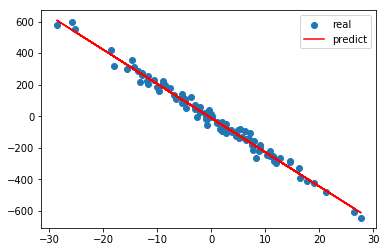

In [22]:
import random
%matplotlib inline
import matplotlib.pyplot as plt
#TODO Construct the linear function
m_truth = round(random.gauss(0, 10), 4)
b_truth = round(random.gauss(0, 10), 4)
    
#TODO Construct points with gaussian noise
x_data = []
x = []
y = []
for i in range(100):
    x.append([])
    x_value = round(random.gauss(0, 10), 4)
    x[i].append(x_value)
    x_data.append([])
    x_data[i].append(x_value)
    x[i].append(1)

    y.append([])
    y[i].append(m_truth * x[-1][0] + b_truth + random.gauss(0, 30))

p1 = plt.scatter(x_data, y)

#TODO Compute m and b and compare with ground truth
m_compute, b_compute = linearRegression((x, y))
y_predict = []
for i in range(100):
    y_predict.append(x_data[i][0] * m_compute + b_compute)
p2 = plt.plot(x_data, y_predict, color='red')
plt.legend((p1, p2[0]), ("real", "predict"))
    
# if not (abs(m_compute - m_truth) / m_truth < 2e-2 and abs(b_compute - b_truth) / b_truth < 2e-2):
#     raise ValueError("m_truth={}, b_truth={} but got m_compute={}, b_compute={}".format(m_truth, b_truth, m_compute, b_compute))
# print("OK")

print("m_truth={}, b_truth={}, m_compute={}, b_compute={}".format(m_truth, b_truth, m_compute, b_compute))